In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
submission_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Preprocessing

In [10]:
train_df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [11]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] +1

In [13]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,NaN,1,2,23.4500,S,4
889,1,1,male,26.0,0,0,30.0000,C,1


In [14]:
train_df.drop(['SibSp', 'Parch'], axis=1, inplace = True)

In [15]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,NaN,23.4500,S,4
889,1,1,male,26.0,30.0000,C,1


## Dealing with Null Values

In [16]:
train_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Family_size      0
dtype: int64

In [17]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
train_df.dropna(subset=['Embarked'], inplace=True)

In [19]:
le = LabelEncoder()

In [20]:
for col in ['Embarked', 'Sex']:
    train_df[col] = le.fit_transform(train_df[col])

In [21]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,1
887,1,1,0,19.0,30.0000,2,1
888,0,3,0,NaN,23.4500,2,4
889,1,1,1,26.0,30.0000,0,1


In [22]:
train_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         0
Family_size      0
dtype: int64

### Replacing null values in Age with its mean

In [23]:
mean_age = train_df['Age'].mean()

In [24]:
mean_age

29.64209269662921

In [25]:
train_df['Age'].replace(np.NaN, mean_age, inplace=True)

<AxesSubplot:>

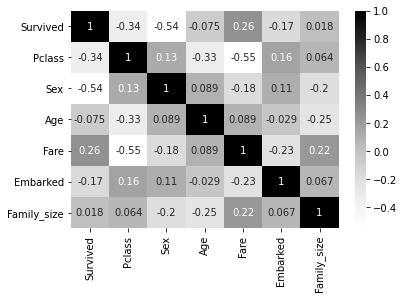

In [26]:
sns.heatmap(train_df.corr(), cmap='Greys', annot=True)

In [27]:
train_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

## Making Feature set X and Target Variable Y

In [28]:
X = train_df.drop(['Survived'], axis=1)
Y = train_df['Survived']

In [29]:
X

,Pclass,Sex,Age,Fare,Embarked,Family_size
0,3,1,22.000000,7.2500,2,2
1,1,0,38.000000,71.2833,0,2
2,3,0,26.000000,7.9250,2,1
3,1,0,35.000000,53.1000,2,2
4,3,1,35.000000,8.0500,2,1
...,...,...,...,...,...,...
886,2,1,27.000000,13.0000,2,1
887,1,0,19.000000,30.0000,2,1
888,3,0,29.642093,23.4500,2,4
889,1,1,26.000000,30.0000,0,1


In [30]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## Spliting Data in Train and Test sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)

X_train (711, 6)
Y_train (711,)
X_test (178, 6)
Y_test (178,)


In [33]:
Y_train

364    0
256    1
477    0
272    1
554    1
      ..
837    0
193    1
630    1
560    0
685    0
Name: Survived, Length: 711, dtype: int64

In [34]:
scaler = preprocessing.MaxAbsScaler()
X = scaler.fit_transform(X)

# Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

print(lr.intercept_)
print(lr.coef_)

[6.03340255]
[[-1.07575944e+00 -2.87088413e+00 -5.00993901e-02  2.47870922e-03
  -3.44198166e-01 -2.35617613e-01]]


In [36]:
score = lr.score(X_test, Y_test)
score

0.7191011235955056

In [37]:
y_pred = lr.predict(X_test)

In [38]:
print(f"f1_score {f1_score(Y_test, y_pred, average='macro')}")
print(f"accuracy_score {accuracy_score(Y_test, y_pred)}")

f1_score 0.7025401069518717
accuracy_score 0.7191011235955056


# Deep Neural Network

In [39]:
model = Sequential()
model.add(Dense(35, input_dim=X_train.shape[1], activation='relu',kernel_initializer='RandomUniform'))
model.add(Dense(25,activation='relu',kernel_initializer='RandomUniform'))
model.add(Dense(15,activation='relu',kernel_initializer='RandomUniform'))
model.add(Dense(5,activation='relu',kernel_initializer='RandomUniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='RandomUniform'))

In [40]:
#Compiling Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
history = model.fit(X_train,Y_train,verbose=2,epochs=10)

Epoch 1/10
23/23 - 1s - loss: 0.6919 - accuracy: 0.6245
Epoch 2/10
23/23 - 0s - loss: 0.6886 - accuracy: 0.6245
Epoch 3/10
23/23 - 0s - loss: 0.6796 - accuracy: 0.6329
Epoch 4/10
23/23 - 0s - loss: 0.6485 - accuracy: 0.6667
Epoch 5/10
23/23 - 0s - loss: 0.6052 - accuracy: 0.6878
Epoch 6/10
23/23 - 0s - loss: 0.5908 - accuracy: 0.6920
Epoch 7/10
23/23 - 0s - loss: 0.5920 - accuracy: 0.6821
Epoch 8/10
23/23 - 0s - loss: 0.5912 - accuracy: 0.6864
Epoch 9/10
23/23 - 0s - loss: 0.5886 - accuracy: 0.6821
Epoch 10/10
23/23 - 0s - loss: 0.5850 - accuracy: 0.6864


In [41]:
test_acc = model.evaluate(X_test, Y_test,verbose=1)
print(test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.6629
[0.6394461989402771, 0.6629213690757751]


In [42]:
acur = history.history['accuracy']

In [43]:
key_values = model.history.history.keys()

In [44]:
key_values

dict_keys([])

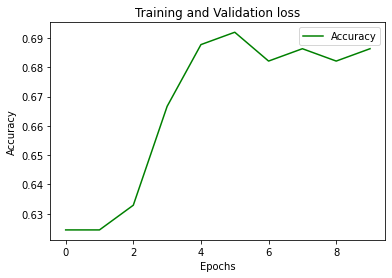

In [45]:
plt.plot(acur, 'g', label='Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
pred_nn = model.predict(X_test)
pred_nn[pred_nn<0.5]=0
pred_nn[pred_nn>=0.5]=1

## Confusion Matrix

In [47]:
labels = [0 , 1]

width = 5
height = 5

title = "Confusion Matrix"

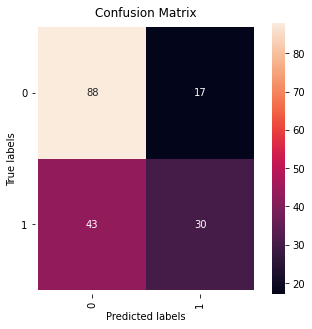

In [48]:
cm = confusion_matrix(Y_test, pred_nn, labels=labels)
fig = plt.figure(figsize=(width, height))
ax = plt.subplot()
ax = sns.heatmap(cm, annot=True, ax=ax, fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(title)
ax.xaxis.set_ticklabels(labels, rotation=90)
ax.yaxis.set_ticklabels(labels, rotation=0)
bottom, top = ax.get_ylim()
left, right = ax.get_xlim()
delta = 0.0325
ax.set_ylim(bottom + delta, top - delta)
ax.set_xlim(left - delta, right + delta)
# plt.savefig(name + ".pdf", bbox_inches='tight')
plt.show()
# return ax

In [49]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [50]:
test_data = test_df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=False)

In [51]:
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] +1

In [52]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,2
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,1
414,1,female,39.0,0,0,108.9000,C,1
415,3,male,38.5,0,0,7.2500,S,1
416,3,male,NaN,0,0,8.0500,S,1


In [53]:
test_data.drop(['SibSp', 'Parch'], axis=1, inplace = True)

In [54]:
test_data.isnull().sum()

Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Family_size     0
dtype: int64

In [55]:
test_data['Fare']= test_data['Fare'].fillna(test_data['Fare'].mean())

In [56]:
for col in ['Embarked', 'Sex']:
    test_data[col] = le.fit_transform(test_data[col])

In [57]:
mean_age_test = test_data['Age'].mean()

In [58]:
test_data['Age'].replace(np.NaN, mean_age_test, inplace=True)

In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    int64  
 5   Family_size  418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [60]:
y_pred_test = lr.predict(test_data)

In [61]:
len(y_pred_test)

418

In [62]:
test_df['Fare'].isnull().sum()

1

In [63]:
len(test_df['PassengerId'])

418

In [68]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_pred_test})
output.to_csv('my_submission_test.csv', index=False)

In [69]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
